In [32]:
from numpy import array
from numpy import argmax
from keras.optimizers import RMSprop, Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671)

In [33]:
#defining the function that will be used to display the graph for loss and number of epochs
def graph_plot(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

In [34]:
#reading the dataset
dataset = pd.read_csv('green_clean_2018.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606537 entries, 0 to 1606536
Data columns (total 25 columns):
VendorID                 1606537 non-null float64
lpep_pickup_datetime     1606537 non-null object
lpep_dropoff_datetime    1606537 non-null object
dispatch                 1606537 non-null int64
RatecodeID               1606537 non-null float64
PULocationID             1606537 non-null float64
DOLocationID             1606537 non-null float64
passenger_count          1606537 non-null float64
trip_distance            1606537 non-null float64
fare_amount              1606537 non-null float64
extra                    1606537 non-null float64
mta_tax                  1606537 non-null float64
tip_amount               1606537 non-null float64
tolls_amount             1606537 non-null float64
improvement_surcharge    1606537 non-null float64
total_amount             1606537 non-null float64
payment_type             1606537 non-null float64
trip_type                1606537 non-null

In [35]:
#dropping unwanted parameters as these parameters have been cleaned and saved in new variables
X = dataset.drop(columns=['dispatch','trip_type', 'VendorID','improvement_surcharge','payment_type','mta_tax', 
                         'RatecodeID','tolls_amount','PUT','DOT','lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PUD', 'DOD'],axis=1)
y = dataset['PULocationID']

X.head()

,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,tip_amount,total_amount,day,month,PickUp_hr
0,97.0,65.0,1.0,0.00,20.0,0.0,3.00,23.00,1,2,0
1,256.0,80.0,5.0,1.60,7.5,0.5,0.88,9.68,1,2,0
2,25.0,95.0,1.0,9.60,28.5,0.5,5.96,35.76,1,2,0
3,61.0,61.0,1.0,0.73,4.5,0.5,0.00,5.80,1,2,0
4,65.0,17.0,2.0,1.87,8.0,0.5,0.00,9.30,1,2,0


In [36]:
#setting up the parameters
NB_EPOCH = 20
BATCH_SIZE = 128
VALIDATION_SPLIT=0.2
VERBOSE = 1
OPTIMIZER = SGD() 
N_HIDDEN = 128
DROPOUT = 0.3

In [37]:
#Defining the one hot encoding function 
def OneHotEncoding(y):
    data = array(y)
    encoded = to_categorical(data)
    print(np.shape(encoded))
    return encoded

In [38]:
#definning the architecture of the mlp model
def model(N_HIDDEN,RESHAPED,NB_CLASSES,OPTIMIZER,DROPOUT):
    model = Sequential()
    model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
    model.add(Activation('relu'))
    model.add(Dense(N_HIDDEN))
    model.add(Activation('relu'))
    #model.add(Dropout(DROPOUT))
    model.add(Dense(NB_CLASSES))
    model.add(Activation('softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
    optimizer=OPTIMIZER,
    metrics=['accuracy'])
    return model

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
RESHAPED = len(X_train.columns)

In [40]:
#getting y_train from the function one hot encoding
y_train = OneHotEncoding(y_train)
NB_CLASSES = y_train.shape[1]

(1285229, 266)


In [41]:
#showing the model
model= model(N_HIDDEN,RESHAPED,NB_CLASSES,OPTIMIZER,DROPOUT)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               1536      
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 266)               34314     
_________________________________________________________________
activation_9 (Activation)    (None, 266)               0         
Total params: 52,362
Trainable params: 52,362
Non-trainable params: 0
_________________________________________________________________


In [42]:
#running the model
history = model.fit(X_train, y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 1028183 samples, validate on 257046 samples
Epoch 1/20
1028183/1028183 [==============================] - 36s 35us/step - loss: 2.7744 - acc: 0.2708 - val_loss: 2.4908 - val_acc: 0.3210
Epoch 2/20
1028183/1028183 [==============================] - 36s 35us/step - loss: 2.4224 - acc: 0.3306 - val_loss: 2.3040 - val_acc: 0.3484
Epoch 3/20
1028183/1028183 [==============================] - 33s 32us/step - loss: 2.2814 - acc: 0.3602 - val_loss: 2.2124 - val_acc: 0.3805
Epoch 4/20
1028183/1028183 [==============================] - 37s 36us/step - loss: 2.1870 - acc: 0.3817 - val_loss: 2.1171 - val_acc: 0.3958
Epoch 5/20
1028183/1028183 [==============================] - 33s 32us/step - loss: 2.1131 - acc: 0.3987 - val_loss: 2.2325 - val_acc: 0.3683
Epoch 6/20
1028183/1028183 [==============================] - 32s 31us/step - loss: 2.0490 - acc: 0.4145 - val_loss: 2.0825 - val_acc: 0.3970
Epoch 7/20
1028183/1028183 [==============================] - 33s 32us/step - loss: 1.9937 - ac

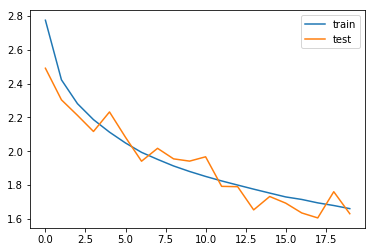

In [43]:
#plotting using the graph_plot function
graph_plot(history)

In [44]:
y_test = OneHotEncoding(y_test)

(321308, 266)


In [45]:
#printing the accuracy of the model
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

321308/321308 [==============================] - 9s 29us/step
Test score: 1.6302133896190376
Test accuracy: 0.5145250040444781
